In [1]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sympy as sym

### **1-a) Estimate daily continuous yield curve and instantaneous forward rate curve by fitting a cubic spline function to the above discrete CMY.**

#### take the date 2020-04-03 for example

In [2]:
# x is the year
x = [1/12,1/6,1/4,1/2,1.00,2.00,3.00,5.00,7.00,10.00,20.00,30.00]

# y is the yield rate on 2020-04-03
y = [0.12,0.12,0.12,0.16,0.16,0.20,0.26,0.36,0.53,0.65,1.08,1.27]

In [3]:
# fitting the cubicspline curve
cs = CubicSpline(x, y, bc_type = 'natural')

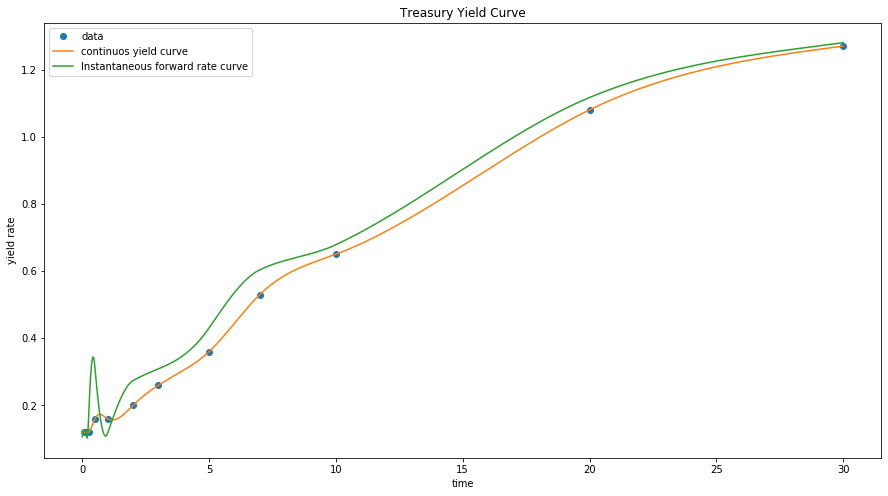

In [4]:
xs = np.linspace(0,30,10000)
plt.figure(figsize=(15,8))
plt.plot(x, y, 'o', label='data')
plt.plot(xs, cs(xs), label="continuos yield curve")
plt.plot(xs,cs(xs)+(cs(xs)-cs(xs-xs[1]))/xs[1],label='Instantaneous forward rate curve')
plt.xlabel('time')
plt.ylabel('yield rate')
plt.title('Treasury Yield Curve')
plt.legend(loc='upper left', ncol=1)
plt.show()

### **1-b) Graph the end on the months yield curves and instantaneous forward rate curve , and comment on the monthly changes of the two curves**

In [5]:
ytm=pd.read_csv('ytm.csv',index_col = 'Date', parse_dates=True)

In [6]:
ytm.head()

,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,
2019-08-01,2.11,2.14,2.07,2.04,1.88,1.73,1.67,1.68,1.77,1.90,2.21,2.44
2019-08-02,2.11,2.12,2.06,2.02,1.85,1.72,1.67,1.66,1.75,1.86,2.16,2.39
2019-08-05,2.07,2.08,2.05,1.99,1.78,1.59,1.55,1.55,1.63,1.75,2.07,2.30
2019-08-06,2.05,2.08,2.05,2.00,1.80,1.60,1.54,1.53,1.62,1.73,2.03,2.25
2019-08-07,2.02,2.04,2.02,1.95,1.75,1.59,1.51,1.52,1.60,1.71,2.01,2.22


**In 2020, there are four months, 2019-08-30,2019-09-30,2019-10-31,2019-11-29,2019-12-31,2020-01-31,2020-02-28,2020-03-31**

In [7]:
dic = [ "2019-08-30","2019-09-30","2019-10-31","2019-11-29","2019-12-31","2020-01-31","2020-02-28","2020-03-31"]

In [8]:
# x is the year
x = [1/12,1/6,1/4,1/2,1.00,2.00,3.00,5.00,7.00,10.00,20.00,30.00]

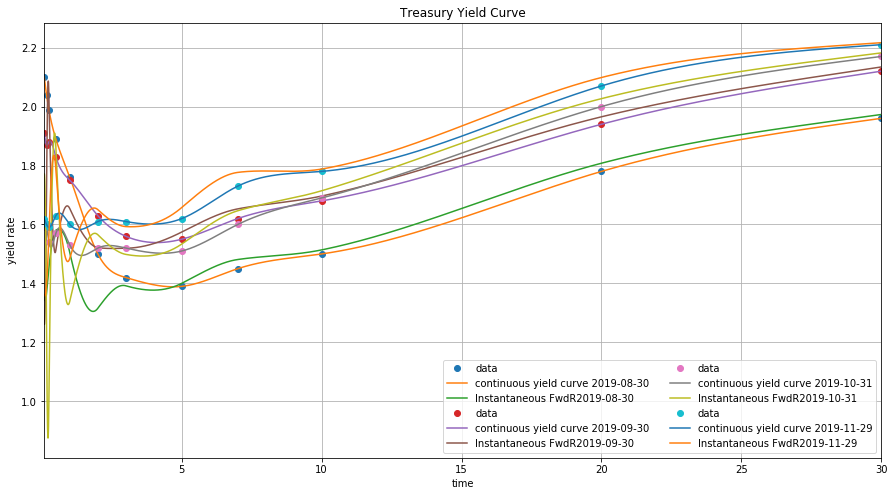

In [9]:
xs = np.linspace(0,30,10000)
plt.figure(figsize=(15,8))
for i in dic[:4]:
    y = ytm.loc[i]
    cs = CubicSpline(x, y, bc_type = 'natural')
    plt.plot(x, y, 'o', label='data')
    plt.plot(xs, cs(xs), label=f"continuous yield curve {i}")
    plt.plot(xs,cs(xs)+(cs(xs)-cs(xs-xs[1]))/xs[1],label=f'Instantaneous FwdR{i}')
plt.xlim(min(x), max(x))
plt.xlabel('time')
plt.ylabel('yield rate')
plt.title('Treasury Yield Curve')
plt.grid(True)
plt.legend(loc='lower right', ncol=2)
plt.show()

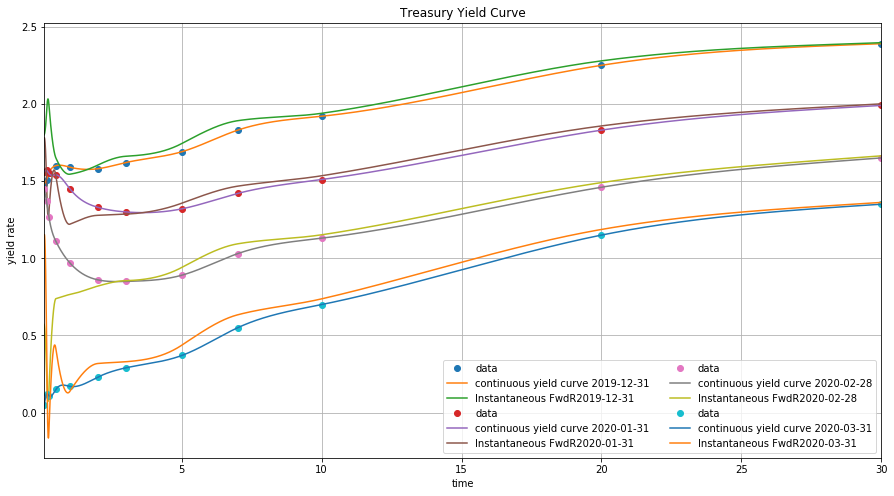

In [10]:
xs = np.linspace(0,30,10000)
plt.figure(figsize=(15,8))
for i in dic[4:]:
    y = ytm.loc[i]
    cs = CubicSpline(x, y, bc_type = 'natural')
    plt.plot(x, y, 'o', label='data')
    plt.plot(xs, cs(xs), label=f"continuous yield curve {i}")
    plt.plot(xs,cs(xs)+(cs(xs)-cs(xs-xs[1]))/xs[1],label=f'Instantaneous FwdR{i}')
plt.xlim(min(x), max(x))
plt.xlabel('time')
plt.ylabel('yield rate')
plt.title('Treasury Yield Curve')
plt.grid(True)
plt.legend(loc='lower right', ncol=2)
plt.show()

### Comment: in the first 3-5 years, most of the continuous yield curve are below instantaneous forward rate curve, but after that year range, eventually the positions are reveresed; We also can find out that in the short term, the some bonds' continuous yield curves and instantaneous forward rates curves have a plunge but all increase gradually and soomthly later on.

### **2-a:  For each of deliverable bonds using the estimated yield curve in 1) find the time series of daily price of the bonds in 2020.**

In [11]:
import datetime
from dateutil.relativedelta import relativedelta
from calendar import monthrange

In [12]:
data = pd.read_excel("TYM0_dlv_20200403.xlsx")
data

,Cash Security,Price,Source,Conven Yield,Conver Factor,Gro/Bas (32nds),Implied Repo%,Unnamed: 7,Actual Repo%,Net/Bas (32nds)
0,T 2 ¼ 02/15/27,111-29 1/4,BGN,0.482,0.8006,14.977,0.217,NaN,0.074,-1.208
1,T 1 ¾ 12/31/26,108-11 1/4,BGN,0.488,0.7740,19.467,-0.777,NaN,0.074,6.998
2,T 1 ½ 01/31/27,106-24+,BGN,0.490,0.7607,27.962,-2.072,NaN,0.074,17.352
3,T 1 ⅛ 02/28/27,104-09 3/4,BGN,0.490,0.7408,37.856,-3.744,NaN,0.074,30.125
4,T 2 ⅜ 05/15/27,113-07,BGN,0.481,0.8012,54.055,-4.246,NaN,0.074,37.046
5,T 2 ¼ 08/15/27,112-22,BGN,0.493,0.7882,94.963,-9.153,NaN,0.074,78.782
6,T 0 ⅝ 03/31/27,100-28 3/4,BGN,0.494,0.7052,87.437,-10.859,NaN,0.074,83.356
7,T 2 ¼ 11/15/27,113-00+,BGN,0.504,0.7821,132.636,-13.543,NaN,0.074,116.555
8,T 2 ¾ 02/15/28,117-06+,BGN,0.514,0.8060,160.173,-15.715,NaN,0.074,140.281
9,T 2 ⅞ 05/15/28,118-18+,BGN,0.531,0.8085,193.037,-19.106,NaN,0.074,172.345


#### Get coupon rates - C

In [13]:
mydic = {data["Cash Security"].iloc[0][4]: 0.25, data["Cash Security"].iloc[1][4]:0.75, data["Cash Security"].iloc[2][4]:0.5, 
         data["Cash Security"].iloc[3][4]:0.125, data["Cash Security"].iloc[4][4]:0.375, data["Cash Security"].iloc[6][4]:0.625,
        data["Cash Security"].iloc[9][4]:0.875}
lst = [int(i[2]) for i in data["Cash Security"]]

C = [i+mydic[j[4]] for i, j in zip(lst,data['Cash Security'])]

#### Get maturity dates - T

In [14]:
T = [i[6:] for i in data["Cash Security"]]
T =  list(map(lambda x: datetime.datetime.strptime(x,'%m/%d/%y'), T))

#### Get coupon dates - t

In [15]:
t = {}
for i in range(len(T)):
    d = T[i]
    lst = []
    while d.year > 2019:
        lst.append(d)
        d -= relativedelta(months=6)
    lst.sort()
    t[i] = lst

### Calculating pv

In [16]:
# all yield in 2020
ytm2020 = ytm[ytm.index >= "2020-01-01"]

In [17]:
# all dates to now in 2020
dates = ytm2020.index.tolist()

**T**: maturities, **t**: coupon dates, **C**: coupons, **dates**: 2020 dates to now, **ytm2020**: all yields in 2020 to now

In [18]:
# dataframe of present values of 17 coupons
pv = pd.DataFrame(columns=[i for i in range(17)])
pv['Date']=dates
pv.set_index('Date',inplace= True)

In [19]:
N = len(data)
for k in range(len(dates)):
    cs = CubicSpline(x, ytm2020.iloc[k], bc_type = 'natural')
    for i in range(N): # N = 17 = number of bonds
        sum_ = 0
        c = C[i] / 2 # semi-annual coupons
        
        # conditions (*) to control the relation between coupon dates and current dates
        # if coupon dates should be always greater than current date
        a = 0
        while t[i][a] <= dates[k]:
            a += 1
        for j in t[i][a:]: # t[i] the i-th bonds' all coupon dates start from a where a match the condition (*)
            t_diff = (j-dates[k]).days / 365 # calculating T_i - t
            y = cs(t_diff)/100 # calculating y(t,T_i) !! whether we need to divide it by 2???
            sum_ += c/(1+y)**t_diff # calculating present value of each coupon based on its own y(t,T_i)
        sum_ += 100/(1+y)**t_diff # present value of principals at y(t,T_j)
        # assign to pv dataframe
        pv.iloc[k][i] = sum_

In [20]:
pv.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Date,,,,,,,,,,,,,,,,,
2020-01-02,103.984,99.8381,98.7686,95.9641,104.343,104.055,92.27,103.524,108.086,108.538,109.426,110.957,107.567,104.855,98.6072,99.247,97.2035
2020-01-03,104.52,100.36,99.2899,96.482,104.893,104.617,92.7825,104.101,108.69,109.163,110.069,111.627,108.244,105.544,99.2929,99.9565,97.9239
2020-01-06,104.468,100.309,99.2403,96.4341,104.843,104.567,92.7366,104.051,108.638,109.108,110.012,111.565,108.181,105.477,99.2248,99.8829,97.8467
2020-01-07,104.346,100.19,99.1199,96.313,104.716,104.436,92.6149,103.916,108.497,108.962,109.862,111.41,108.022,105.316,99.0629,99.7161,97.6769
2020-01-08,104.08,99.9324,98.8634,96.0588,104.442,104.156,92.3644,103.628,108.194,108.649,109.54,111.074,107.685,104.973,98.724,99.3652,97.3212


In [21]:
pv.loc['2020-04-03']

0     112.079
1     108.746
2      106.94
3     104.279
4     113.894
5     112.731
6     100.751
7     113.622
8     117.321
9      119.51
10    119.275
11    122.685
12    118.041
13    116.802
14    109.606
15    111.416
16    108.745
Name: 2020-04-03 00:00:00, dtype: object

In [22]:
pv.rename(columns = data['Cash Security'], inplace = True)

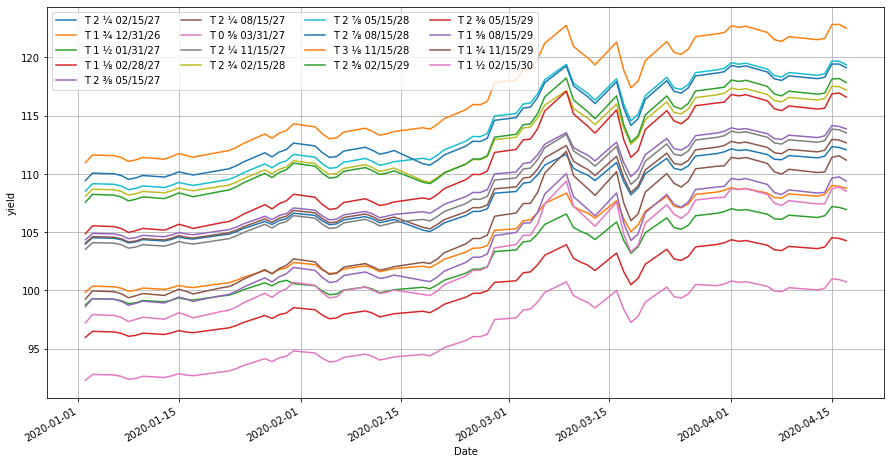

In [23]:
ax = pv.plot(figsize=(15,8))
ax.set(ylabel="yield")
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.legend(ncol=4)

### **2-b:  Find the daily rate of return of each bond and conversion factor adjusted return (conversion factor adjusted return is simply the daily return multiply by the conversion factor)** 


#### Get daily rate of return

In [24]:
dailyReturn = pd.DataFrame(columns=[i for i in range(17)])
dailyReturn['Date']=dates[1:]
dailyReturn.set_index('Date',inplace= True)

In [25]:
N = len(data)
for i in range(1, len(pv)):
    for j in range(N):
        dailyReturn.iloc[i-1][j] = pv.iloc[i][j]/pv.iloc[i-1][j]-1

In [26]:
dailyReturn.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Date,,,,,,,,,,,,,,,,,
2020-01-03,0.00515518,0.00522723,0.00527721,0.00539672,0.00527607,0.00539897,0.00555438,0.00557006,0.00558783,0.00575318,0.005879,0.00603721,0.00628837,0.00657111,0.00695473,0.00714885,0.00741068
2020-01-06,-0.000491379,-0.000510154,-0.000499515,-0.000496277,-0.000482387,-0.000471615,-0.000494573,-0.000478813,-0.000480905,-0.000502796,-0.000519388,-0.000552964,-0.000585399,-0.000633246,-0.000686077,-0.000736347,-0.000788077
2020-01-07,-0.00116971,-0.00118851,-0.00121268,-0.00125585,-0.0012093,-0.00125315,-0.00131223,-0.00130082,-0.00129867,-0.00133599,-0.00136585,-0.00139482,-0.00146159,-0.00152864,-0.00163205,-0.00167007,-0.00173545
2020-01-08,-0.00254834,-0.00256716,-0.0025879,-0.0026393,-0.00261759,-0.00267966,-0.00270506,-0.00276677,-0.00278701,-0.00287068,-0.00293047,-0.00301118,-0.00312133,-0.00325248,-0.00342091,-0.00351858,-0.00364176
2020-01-09,0.00072751,0.000730061,0.000731907,0.00074227,0.000754889,0.000790813,0.000756987,0.000849268,0.000901009,0.000980674,0.00106246,0.00116108,0.00128317,0.00142217,0.00159978,0.00174046,0.0019065


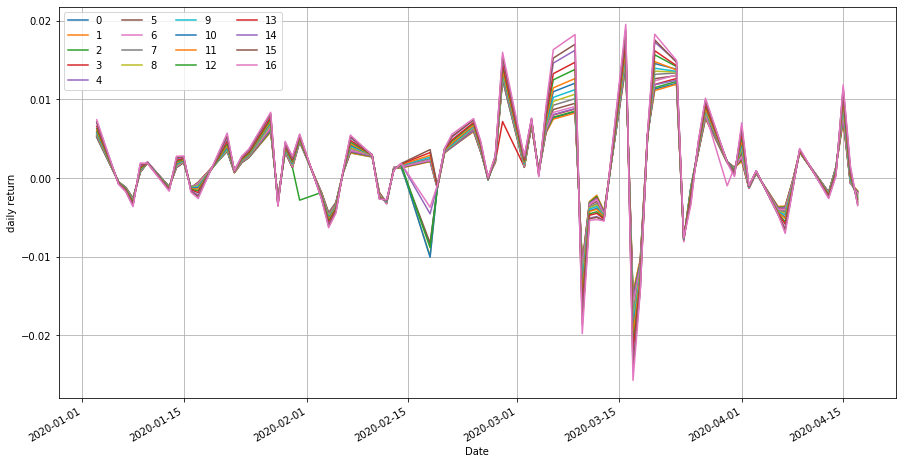

In [27]:
ax = dailyReturn.plot(figsize=(15,8))
ax.set(ylabel="daily return")
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.legend(ncol=4)

#### Get conversion factor adjusted return

In [28]:
adj_con_return = dailyReturn
for i in range(N):
    adj_con_return[i]*=data['Conver Factor'][i]

In [29]:
adj_con_return.rename(columns = data['Cash Security'], inplace = True)

In [30]:
adj_con_return

,T 2 ¼ 02/15/27,T 1 ¾ 12/31/26,T 1 ½ 01/31/27,T 1 ⅛ 02/28/27,T 2 ⅜ 05/15/27,T 2 ¼ 08/15/27,T 0 ⅝ 03/31/27,T 2 ¼ 11/15/27,T 2 ¾ 02/15/28,T 2 ⅞ 05/15/28,T 2 ⅞ 08/15/28,T 3 ⅛ 11/15/28,T 2 ⅝ 02/15/29,T 2 ⅜ 05/15/29,T 1 ⅝ 08/15/29,T 1 ¾ 11/15/29,T 1 ½ 02/15/30
Date,,,,,,,,,,,,,,,,,
2020-01-03,0.00412724,0.00404588,0.00401437,0.00399789,0.00422718,0.00425546,0.00391695,0.00435635,0.00450379,0.00465145,0.00472496,0.00492033,0.00489109,0.00496776,0.00486205,0.00501564,0.00502222
2020-01-06,-0.000393398,-0.000394859,-0.000379981,-0.000367642,-0.000386488,-0.000371727,-0.000348773,-0.00037448,-0.00038761,-0.000406511,-0.000417432,-0.000450666,-0.000455323,-0.000478734,-0.000479636,-0.000516621,-0.00053408
2020-01-07,-0.000936467,-0.000919908,-0.000922485,-0.000930337,-0.00096889,-0.00098773,-0.000925385,-0.00101737,-0.00104672,-0.00108015,-0.00109774,-0.00113678,-0.00113683,-0.00115565,-0.00114097,-0.00117172,-0.00117611
2020-01-08,-0.0020402,-0.00198698,-0.00196862,-0.00195519,-0.00209721,-0.00211211,-0.00190761,-0.00216389,-0.00224633,-0.00232094,-0.00235522,-0.00245411,-0.00242777,-0.00245887,-0.00239156,-0.00246863,-0.00246802
2020-01-09,0.000582445,0.000565067,0.000556761,0.000549874,0.000604817,0.000623319,0.000533828,0.000664213,0.000726213,0.000792875,0.000853897,0.000946281,0.000998048,0.00107516,0.0011184,0.00122111,0.00129204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-13,-0.00142817,-0.00138626,-0.00138505,-0.00137627,-0.00144634,-0.00147102,-0.00134441,-0.00149036,-0.00156125,-0.00159435,-0.00164278,-0.00169249,-0.00170584,-0.00171639,-0.00169716,-0.00174322,-0.00176468
2020-04-14,0.0010647,0.00103992,0.00103293,0.00101898,0.00105126,0.00102242,0.000985286,0.000973579,0.000946024,0.000879547,0.000805704,0.000725761,0.000608336,0.000494988,0.00035506,0.000257439,0.000145311
2020-04-15,0.00586314,0.00555237,0.00566288,0.00573289,0.00620478,0.00654676,0.00571453,0.00680972,0.00723609,0.0074632,0.00773151,0.00795304,0.00801485,0.00802256,0.00789536,0.00801005,0.00802096


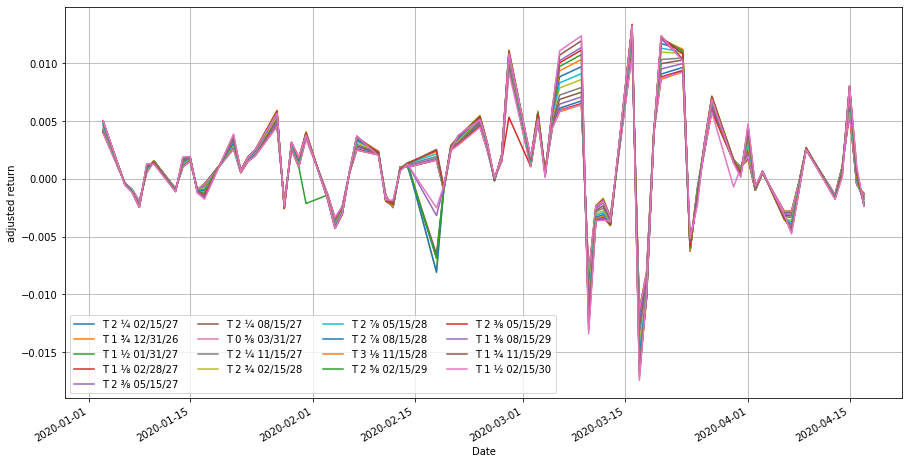

In [31]:
ax = adj_con_return.plot(figsize=(15,8))
ax.set(ylabel="adjusted return")
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.legend(ncol=4)

### **2-c: Compare and comment on the conversion factor adjusted return of the above bonds.**

### we could see that there are no much difference between defferent bonds regardless on March and Middle of Febrary in which it shows us the big variations between different bonds'adjusted returns. The main reason of this pattern is because they are in the same market, they would be affected by almost same factors. Normally, we shall expect that the higher coupon rates give us higher adjusted returns, but in middle of Febrary and March, the variances is large and there is plunge which means there some events happened and crashed the market.

In [32]:
print('Done')

Done


In [34]:
pv.head()

,T 2 ¼ 02/15/27,T 1 ¾ 12/31/26,T 1 ½ 01/31/27,T 1 ⅛ 02/28/27,T 2 ⅜ 05/15/27,T 2 ¼ 08/15/27,T 0 ⅝ 03/31/27,T 2 ¼ 11/15/27,T 2 ¾ 02/15/28,T 2 ⅞ 05/15/28,T 2 ⅞ 08/15/28,T 3 ⅛ 11/15/28,T 2 ⅝ 02/15/29,T 2 ⅜ 05/15/29,T 1 ⅝ 08/15/29,T 1 ¾ 11/15/29,T 1 ½ 02/15/30
Date,,,,,,,,,,,,,,,,,
2020-01-02,103.984,99.8381,98.7686,95.9641,104.343,104.055,92.27,103.524,108.086,108.538,109.426,110.957,107.567,104.855,98.6072,99.247,97.2035
2020-01-03,104.52,100.36,99.2899,96.482,104.893,104.617,92.7825,104.101,108.69,109.163,110.069,111.627,108.244,105.544,99.2929,99.9565,97.9239
2020-01-06,104.468,100.309,99.2403,96.4341,104.843,104.567,92.7366,104.051,108.638,109.108,110.012,111.565,108.181,105.477,99.2248,99.8829,97.8467
2020-01-07,104.346,100.19,99.1199,96.313,104.716,104.436,92.6149,103.916,108.497,108.962,109.862,111.41,108.022,105.316,99.0629,99.7161,97.6769
2020-01-08,104.08,99.9324,98.8634,96.0588,104.442,104.156,92.3644,103.628,108.194,108.649,109.54,111.074,107.685,104.973,98.724,99.3652,97.3212


In [35]:
dailyReturn.head()

,T 2 ¼ 02/15/27,T 1 ¾ 12/31/26,T 1 ½ 01/31/27,T 1 ⅛ 02/28/27,T 2 ⅜ 05/15/27,T 2 ¼ 08/15/27,T 0 ⅝ 03/31/27,T 2 ¼ 11/15/27,T 2 ¾ 02/15/28,T 2 ⅞ 05/15/28,T 2 ⅞ 08/15/28,T 3 ⅛ 11/15/28,T 2 ⅝ 02/15/29,T 2 ⅜ 05/15/29,T 1 ⅝ 08/15/29,T 1 ¾ 11/15/29,T 1 ½ 02/15/30
Date,,,,,,,,,,,,,,,,,
2020-01-03,0.00412724,0.00404588,0.00401437,0.00399789,0.00422718,0.00425546,0.00391695,0.00435635,0.00450379,0.00465145,0.00472496,0.00492033,0.00489109,0.00496776,0.00486205,0.00501564,0.00502222
2020-01-06,-0.000393398,-0.000394859,-0.000379981,-0.000367642,-0.000386488,-0.000371727,-0.000348773,-0.00037448,-0.00038761,-0.000406511,-0.000417432,-0.000450666,-0.000455323,-0.000478734,-0.000479636,-0.000516621,-0.00053408
2020-01-07,-0.000936467,-0.000919908,-0.000922485,-0.000930337,-0.00096889,-0.00098773,-0.000925385,-0.00101737,-0.00104672,-0.00108015,-0.00109774,-0.00113678,-0.00113683,-0.00115565,-0.00114097,-0.00117172,-0.00117611
2020-01-08,-0.0020402,-0.00198698,-0.00196862,-0.00195519,-0.00209721,-0.00211211,-0.00190761,-0.00216389,-0.00224633,-0.00232094,-0.00235522,-0.00245411,-0.00242777,-0.00245887,-0.00239156,-0.00246863,-0.00246802
2020-01-09,0.000582445,0.000565067,0.000556761,0.000549874,0.000604817,0.000623319,0.000533828,0.000664213,0.000726213,0.000792875,0.000853897,0.000946281,0.000998048,0.00107516,0.0011184,0.00122111,0.00129204


In [39]:
benchmark = pv.iloc[0][0]
benchmark

103.98355489311996

In [40]:
pv[data['Cash Security'].iloc[0]]

Date
2020-01-02    103.984
2020-01-03     104.52
2020-01-06    104.468
2020-01-07    104.346
2020-01-08     104.08
               ...   
2020-04-13    111.378
2020-04-14    111.527
2020-04-15    112.343
2020-04-16    112.272
2020-04-17    112.082
Name: T 2 ¼ 02/15/27, Length: 74, dtype: object

In [42]:
pv[data['Cash Security'].iloc[0]].div(benchmark).mul(100)

Date
2020-01-02        100
2020-01-03    100.516
2020-01-06    100.466
2020-01-07    100.349
2020-01-08    100.093
               ...   
2020-04-13    107.112
2020-04-14    107.254
2020-04-15    108.039
2020-04-16    107.971
2020-04-17    107.788
Name: T 2 ¼ 02/15/27, Length: 74, dtype: object